<a href="https://colab.research.google.com/github/vyomer/NC/blob/main/IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

files_load = files.upload()


Saving savings_data_final.csv to savings_data_final.csv


Q1 - 2.284 Q3 - 86.514 IQ - 84.22999999999999
LOWER_median - -124.06099999999998
UPPER_MEDIAN - 212.85899999999998
mean_of_savings - 46.20051938981879
median_of_savings - 36.0475
mode_of_savings - 0.0
stdecv_of_savings - 50.86687191728863


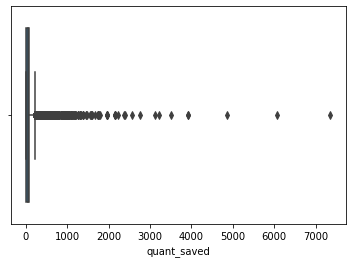

In [8]:
import pandas as pd
import statistics as s
import csv
import seaborn as sns
import plotly.figure_factory as ff
import random
import plotly.graph_objects as go

df = pd.read_csv("savings_data_final.csv")
sns.boxplot(data = df,x = df['quant_saved'])

q1 = df["quant_saved"].quantile(0.25)
q3 = df["quant_saved"].quantile(0.75)
iqr = q3 - q1

print(f"Q1 - {q1}", f"Q3 - {q3}", f"IQ - {iqr}")

lower_median = q1 - 1.5 * iqr
upper_median = q3 + 1.5 * iqr

print(f"LOWER_median - {lower_median}")
print(f"UPPER_MEDIAN - {upper_median}")


new_df = df[df["quant_saved"] < upper_median]
all_savings = new_df["quant_saved"].tolist()

print(f"mean_of_savings - {s.mean(all_savings)}")
print(f"median_of_savings - {s.median(all_savings)}")
print(f"mode_of_savings - {s.mode(all_savings)}")
print(f"stdecv_of_savings - {s.stdev(all_savings)}")

fig = ff.create_distplot([new_df["quant_saved"].tolist()],["savings"],show_hist = False)
fig.show()

sampling_mean_list = []

for i in range(1000):
  temp_list = []
  for j in range(100):
    temp_list.append(random.choice(all_savings))
  sampling_mean_list.append(s.mean(temp_list))

mean_sampling = s.mean(sampling_mean_list)

fig = ff.create_distplot([sampling_mean_list],["savings(sampling)"],show_hist = False)
fig.add_trace(go.Scatter(x = [mean_sampling,mean_sampling], y = [0,0.1], mode = "lines", name = "MEAN"))
fig.show()